In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Leer Dataframe
df = pd.read_csv(r'.\Mental_Health_Lifestyle_Dataset.csv')

In [3]:
df

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Japan,57,Female,Moderate,Balanced,7.0,High,Depression,29,4.4,9.7,5.9
2996,Australia,27,Male,Low,Junk Food,7.1,Low,NaN,47,7.4,6.3,9.9
2997,Australia,42,Male,Moderate,Balanced,6.0,High,Depression,23,3.9,5.2,4.1
2998,Australia,25,Male,High,Keto,5.7,Low,Anxiety,51,4.3,5.9,4.1


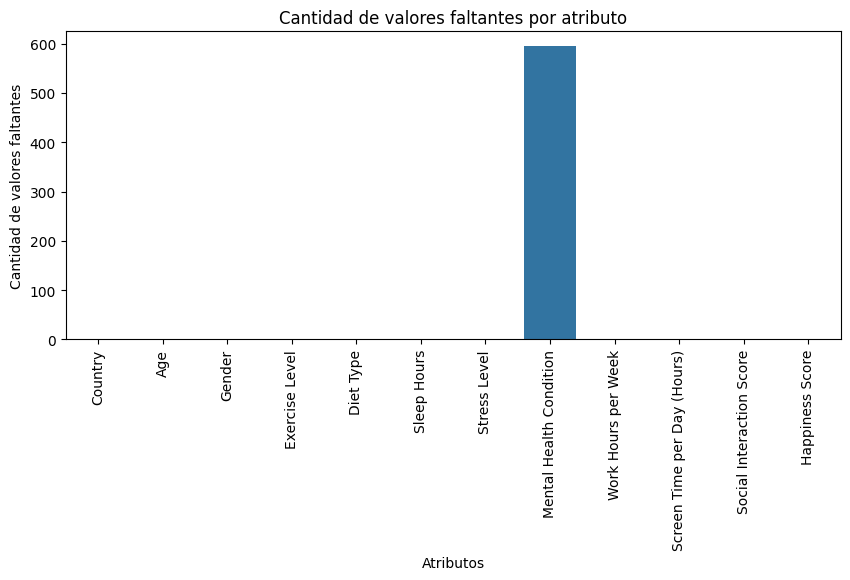

In [10]:
# Contar datos faltantes del dataset y graficarlos
missing_values = df.isnull().sum()
plt.figure(figsize=(10, 4))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Cantidad de valores faltantes por atributo')
plt.xlabel('Atributos')
plt.ylabel('Cantidad de valores faltantes')
plt.show()


In [11]:
# Crear una nueva clase "None" que agrupa a los valores faltantes de Mental Health Condition
df['Mental Health Condition'] = df['Mental Health Condition'].fillna('None')
# Contar cuantos valores faltantes hay en total en el df
missing_values = df.isnull().sum().sum()
print(f'Cantidad de valores faltantes en el dataset: {missing_values}')

Cantidad de valores faltantes en el dataset: 0


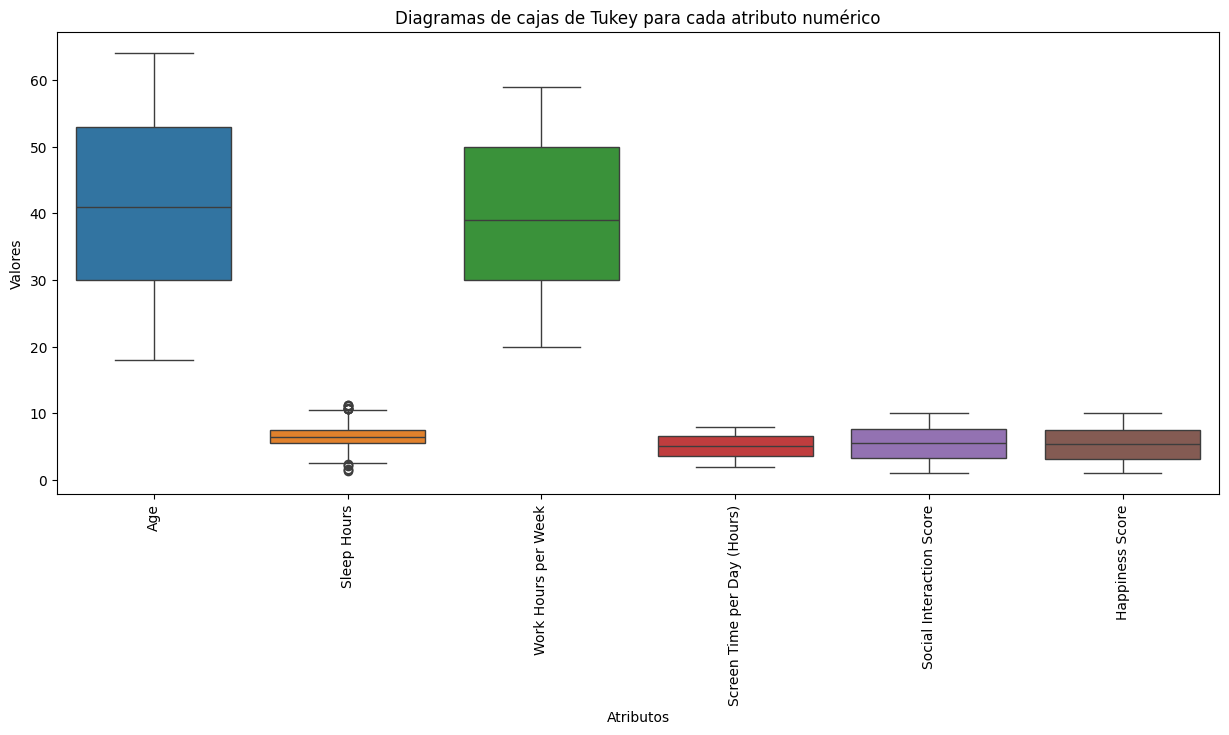

In [12]:
# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns

# Crear el boxplot para todos los atributos numéricos en un solo gráfico
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title('Diagramas de cajas de Tukey para cada atributo numérico')
plt.xlabel('Atributos')
plt.ylabel('Valores')
plt.show()

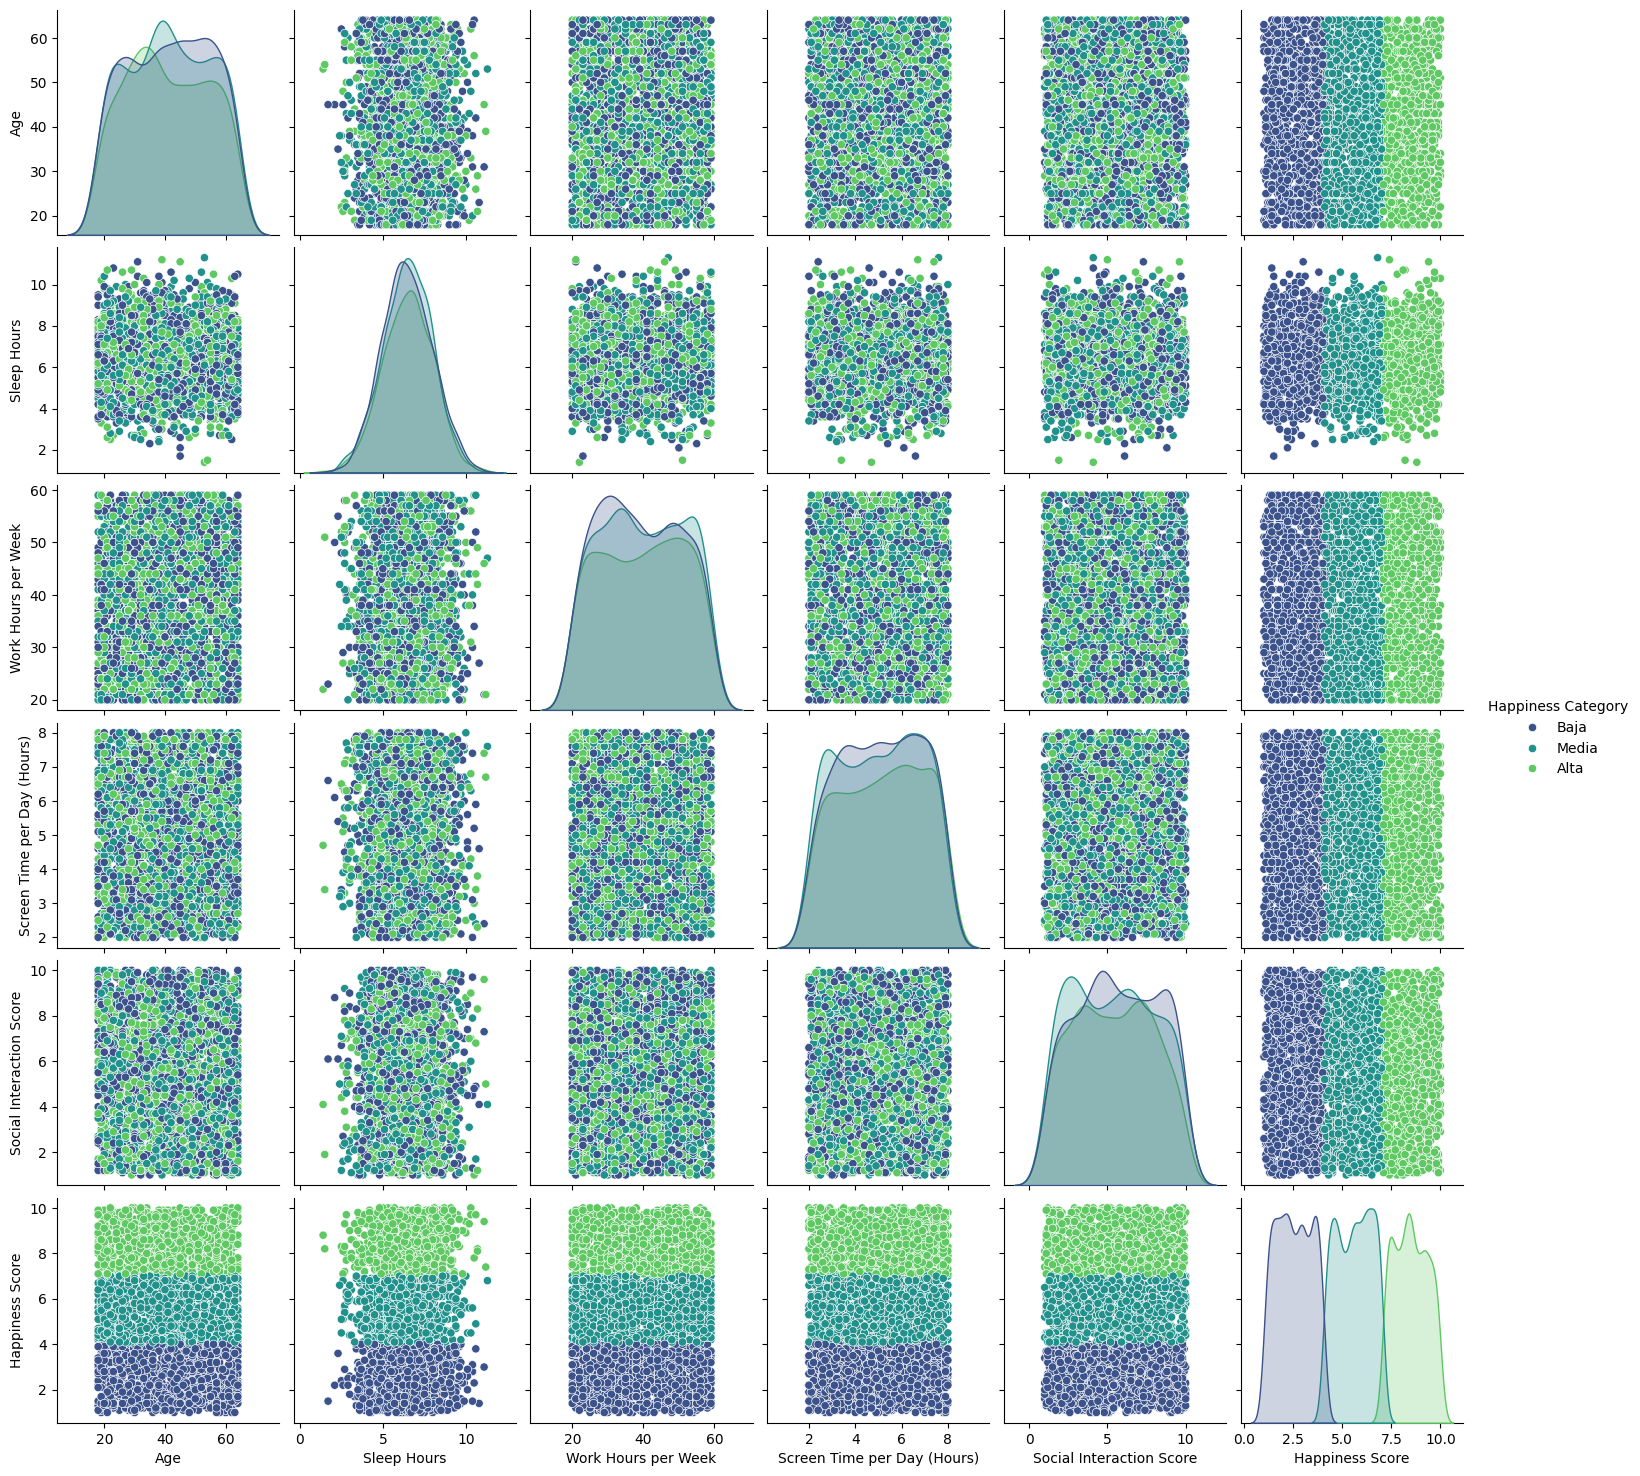

In [15]:

# Crear una columna categórica para 'Happiness Score' (por ejemplo, baja, media, alta)
df['Happiness Category'] = pd.cut(df['Happiness Score'], bins=3, labels=['Baja', 'Media', 'Alta'])

# Hacer un sns.pairplot para ver la relación entre los atributos numéricos,
# coloreando los puntos según la categoría de 'Happiness Score'
sns.pairplot(df[numeric_cols.tolist() + ['Happiness Category']], hue='Happiness Category', palette='viridis')
plt.show()